# EDA on the World Happiness Report
**Objective: To identify which region is the most happy region and which is the least & also evaluate rankings of region on the basis of other variables used to reach at the score**

## Import libraries 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data and Analysis

In [229]:
data = pd.read_csv("..../Documents/2019.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.4+ KB


**So, there are no null values**

In [8]:
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [9]:
data.tail(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [11]:
data['Country or region'].nunique() # all countries are different

156

In [27]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

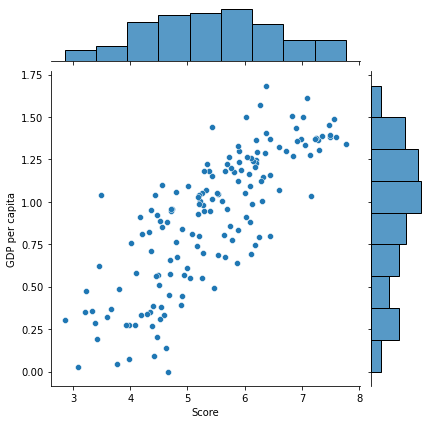

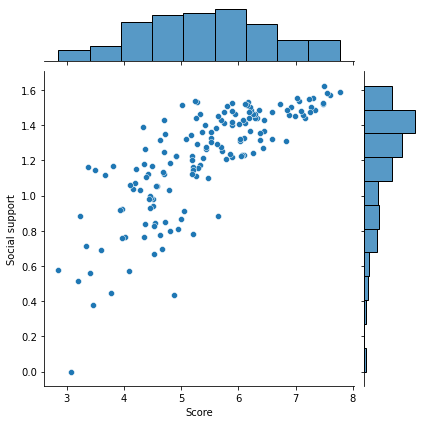

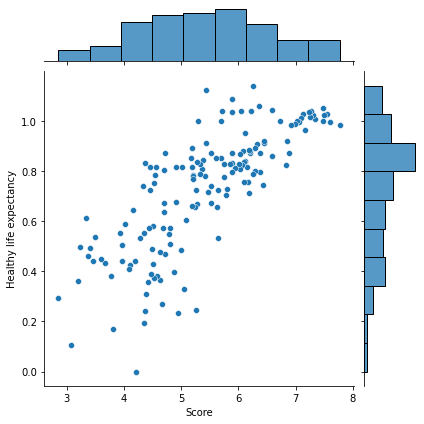

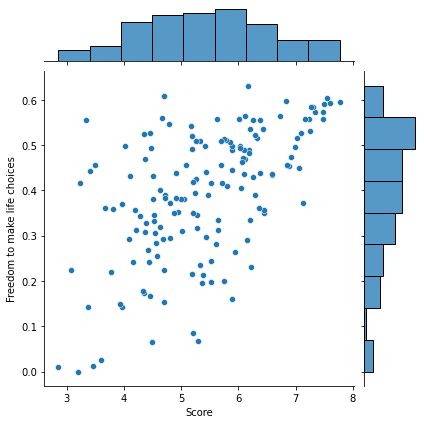

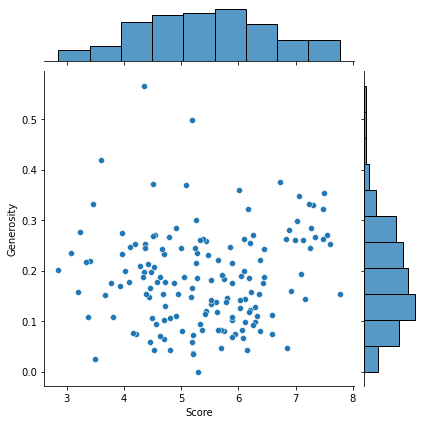

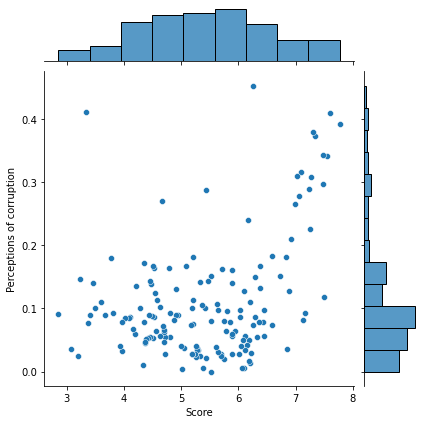

In [26]:
for column_name in data.columns[3:]:
    sns.jointplot(data=data,x='Score',y=column_name)

**Conclusions from Scatter diagrams:**
1. Countries with very high GDP per capita tends to have a high score. 
2. Countries with high Social support mainly are happy 
3. Most of the countries with healthy life expectancy value greater than 0.8 have a score greater than 5 and hance can be considered happy 
4. Countries with low freedom to make life choices generally also has a low happiness score
5. Nothing can be said about the relationship between Genorosity an d Happiness score 
6. No such relationship can be drawn from Perception of corruption and happiness score. 


**Correlation, Heatmap and Clustermap**

In [30]:
data_corr = data.corr()
data_corr

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

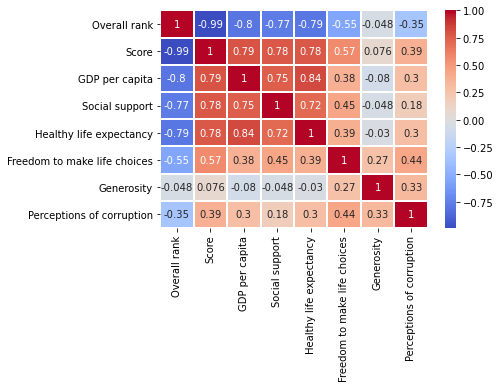

In [52]:
sns.heatmap(data_corr, cmap='coolwarm', linecolor='white', linewidth=1, annot=True)

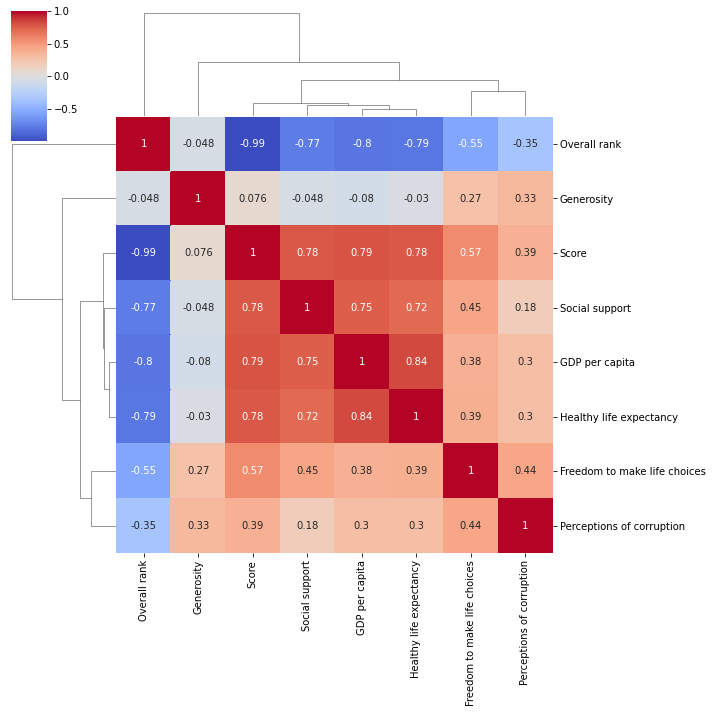

In [53]:
sns.clustermap(data_corr, cmap='coolwarm',annot=True)

**Conclusions from Heatmap and Clustermap**
1. Clearly, correlation between Score and GDP per capita, Social support, Healthy life expectancy and Freedom to make life choices is quite high i.e. greater than 0.50 but the correlation between Perceptions of corruption and score is 0.39 while for the Genorosity and Score the correlation is very low i.e. less than 0.1

**Combining two datasets to get the Region**

Sadly, 2019 data that I got from Kaggle does not have the Region column in it and hence I downloaded the 2016 data which had the Region column in it. I have used the merge in pandas to merge the two dataframes so that I can bring the region into our analysis and answer the question which is the objective of this EDA.

In [54]:
data_16 = pd.read_csv("..../Documents/2016.csv")
data_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [55]:
data_16.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [100]:
list_country =[]
for country in data_16['Country']:
    list_country.append(country.casefold())
print(list_country)
print(len(list_country))

['denmark', 'switzerland', 'iceland', 'norway', 'finland', 'canada', 'netherlands', 'new zealand', 'australia', 'sweden', 'israel', 'austria', 'united states', 'costa rica', 'puerto rico', 'germany', 'brazil', 'belgium', 'ireland', 'luxembourg', 'mexico', 'singapore', 'united kingdom', 'chile', 'panama', 'argentina', 'czech republic', 'united arab emirates', 'uruguay', 'malta', 'colombia', 'france', 'thailand', 'saudi arabia', 'taiwan', 'qatar', 'spain', 'algeria', 'guatemala', 'suriname', 'kuwait', 'bahrain', 'trinidad and tobago', 'venezuela', 'slovakia', 'el salvador', 'malaysia', 'nicaragua', 'uzbekistan', 'italy', 'ecuador', 'belize', 'japan', 'kazakhstan', 'moldova', 'russia', 'poland', 'south korea', 'bolivia', 'lithuania', 'belarus', 'north cyprus', 'slovenia', 'peru', 'turkmenistan', 'mauritius', 'libya', 'latvia', 'cyprus', 'paraguay', 'romania', 'estonia', 'jamaica', 'croatia', 'hong kong', 'somalia', 'kosovo', 'turkey', 'indonesia', 'jordan', 'azerbaijan', 'philippines', 'c

In [101]:
data_16['country_casefold'] = list_country # inserts the column at last 

In [102]:
data_16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country_casefold
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,denmark
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,switzerland
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,iceland
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,norway
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,finland


In [103]:
data.rename(columns = {'Country or region' : 'Country'}, inplace=True)
data.head(5)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country_casefold
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,netherlands


In [104]:
list_country =[]
for country in data['Country']:
    list_country.append(country.casefold())
print(list_country)
print(len(list_country))

['finland', 'denmark', 'norway', 'iceland', 'netherlands', 'switzerland', 'sweden', 'new zealand', 'canada', 'austria', 'australia', 'costa rica', 'israel', 'luxembourg', 'united kingdom', 'ireland', 'germany', 'belgium', 'united states', 'czech republic', 'united arab emirates', 'malta', 'mexico', 'france', 'taiwan', 'chile', 'guatemala', 'saudi arabia', 'qatar', 'spain', 'panama', 'brazil', 'uruguay', 'singapore', 'el salvador', 'italy', 'bahrain', 'slovakia', 'trinidad & tobago', 'poland', 'uzbekistan', 'lithuania', 'colombia', 'slovenia', 'nicaragua', 'kosovo', 'argentina', 'romania', 'cyprus', 'ecuador', 'kuwait', 'thailand', 'latvia', 'south korea', 'estonia', 'jamaica', 'mauritius', 'japan', 'honduras', 'kazakhstan', 'bolivia', 'hungary', 'paraguay', 'northern cyprus', 'peru', 'portugal', 'pakistan', 'russia', 'philippines', 'serbia', 'moldova', 'libya', 'montenegro', 'tajikistan', 'croatia', 'hong kong', 'dominican republic', 'bosnia and herzegovina', 'turkey', 'malaysia', 'bel

In [108]:
data['country_casefold'] = list_country
data.head(5)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country_casefold
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,netherlands


In [123]:
data_19 = data.merge(data_16, how='inner', on='country_casefold')
data_19.tail()
data_19.columns[:12]

Index(['Overall rank', 'Country_x', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity_x',
       'Perceptions of corruption', 'country_casefold', 'Country_y', 'Region'],
      dtype='object')

In [126]:
data_19.drop(data_19.columns[12:], axis = 1, inplace = True)
data_19.head(10)

,Overall rank,Country_x,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_x,Perceptions of corruption,country_casefold,Country_y,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,finland,Finland,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,denmark,Denmark,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,norway,Norway,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,iceland,Iceland,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,netherlands,Netherlands,Western Europe
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,switzerland,Switzerland,Western Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,sweden,Sweden,Western Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,new zealand,New Zealand,Australia and New Zealand
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,canada,Canada,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,austria,Austria,Western Europe


In [127]:
data_19['Region'].unique()

array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   country_casefold              156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 11.0+ KB


In [129]:
data_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  148 non-null    int64  
 1   Country_x                     148 non-null    object 
 2   Score                         148 non-null    float64
 3   GDP per capita                148 non-null    float64
 4   Social support                148 non-null    float64
 5   Healthy life expectancy       148 non-null    float64
 6   Freedom to make life choices  148 non-null    float64
 7   Generosity_x                  148 non-null    float64
 8   Perceptions of corruption     148 non-null    float64
 9   country_casefold              148 non-null    object 
 10  Country_y                     148 non-null    object 
 11  Region                        148 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 12.7+ KB


In [117]:
data_19['country_casefold'][data_19['country_casefold'].isnull()]

Series([], Name: country_casefold, dtype: object)

In [77]:
print(data['Country'].nunique())
print(data_16['Country'].nunique())

156
157


In [72]:
for country in data['Country']:
    print(country)

Finland
Denmark
Norway
Iceland
Netherlands
Switzerland
Sweden
New Zealand
Canada
Austria
Australia
Costa Rica
Israel
Luxembourg
United Kingdom
Ireland
Germany
Belgium
United States
Czech Republic
United Arab Emirates
Malta
Mexico
France
Taiwan
Chile
Guatemala
Saudi Arabia
Qatar
Spain
Panama
Brazil
Uruguay
Singapore
El Salvador
Italy
Bahrain
Slovakia
Trinidad & Tobago
Poland
Uzbekistan
Lithuania
Colombia
Slovenia
Nicaragua
Kosovo
Argentina
Romania
Cyprus
Ecuador
Kuwait
Thailand
Latvia
South Korea
Estonia
Jamaica
Mauritius
Japan
Honduras
Kazakhstan
Bolivia
Hungary
Paraguay
Northern Cyprus
Peru
Portugal
Pakistan
Russia
Philippines
Serbia
Moldova
Libya
Montenegro
Tajikistan
Croatia
Hong Kong
Dominican Republic
Bosnia and Herzegovina
Turkey
Malaysia
Belarus
Greece
Mongolia
North Macedonia
Nigeria
Kyrgyzstan
Turkmenistan
Algeria
Morocco
Azerbaijan
Lebanon
Indonesia
China
Vietnam
Bhutan
Cameroon
Bulgaria
Ghana
Ivory Coast
Nepal
Jordan
Benin
Congo (Brazzaville)
Gabon
Laos
South Africa
Albania


In [132]:
check = True 
list_countries_8 = []  # 156-148 = 8 countries that are missing 
for country_1 in data['country_casefold']:
    for country_2 in data_19['country_casefold']:
        if country_1.casefold() != country_2.casefold():
            check = True 
        else:
            check = False 
            break
    if check:
         list_countries_8.append(country_1)
    continue    
print(list_countries_8)

['trinidad & tobago', 'northern cyprus', 'north macedonia', 'gambia', 'mozambique', 'swaziland', 'lesotho', 'central african republic']


In [148]:
list_countries_8_index=[]
check = True 
for country_index in range(0,len(data['country_casefold'])):
    for missing_country in range(0,len(list_countries_8)):
        if data['country_casefold'][country_index] == list_countries_8[missing_country]:
            check = True
            break
        else: 
            check = False 
    if check:
        list_countries_8_index.append(country_index)
print(list_countries_8_index)

[38, 63, 83, 119, 122, 134, 143, 154]


In [154]:
data_19.head(5)

,Overall rank,Country_x,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_x,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [153]:
data_19.drop(data_19.columns[[-2,-3]], axis = 1, inplace = True)
data_19.head(5)

,Overall rank,Country_x,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_x,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [155]:
data_19.rename(columns= {'Country_x':'Country', 'Generosity_x':'Generosity'}, inplace=True)
data_19.head(5)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [156]:
data_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  148 non-null    int64  
 1   Country                       148 non-null    object 
 2   Score                         148 non-null    float64
 3   GDP per capita                148 non-null    float64
 4   Social support                148 non-null    float64
 5   Healthy life expectancy       148 non-null    float64
 6   Freedom to make life choices  148 non-null    float64
 7   Generosity                    148 non-null    float64
 8   Perceptions of corruption     148 non-null    float64
 9   Region                        148 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 11.6+ KB


In [151]:
data_19_1 = data.iloc[[38, 63, 83, 119, 122, 134, 143, 154]]
data_19_1

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country_casefold
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,trinidad & tobago
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,northern cyprus
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,north macedonia
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,gambia
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,mozambique
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,swaziland
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,lesotho
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,central african republic


In [162]:
data_19_1.drop(data_19_1.columns[-1],axis = 1, inplace = True)
data_19_1

G:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [163]:
data_19_1

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [164]:
data_19['Region'].unique()

array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [165]:
region = ['Latin America and Caribbean','Central and Eastern Europe',
         'Central and Eastern Europe','Sub-Saharan Africa','Sub-Saharan Africa',
         'Sub-Saharan Africa','Sub-Saharan Africa','Sub-Saharan Africa']

In [166]:
data_19_1.insert(2,"Region",region,True)
data_19_1

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
38,39,Trinidad & Tobago,Latin America and Caribbean,6.192,1.231,1.477,0.713,0.489,0.185,0.016
63,64,Northern Cyprus,Central and Eastern Europe,5.718,1.263,1.252,1.042,0.417,0.191,0.162
83,84,North Macedonia,Central and Eastern Europe,5.274,0.983,1.294,0.838,0.345,0.185,0.034
119,120,Gambia,Sub-Saharan Africa,4.516,0.308,0.939,0.428,0.382,0.269,0.167
122,123,Mozambique,Sub-Saharan Africa,4.466,0.204,0.986,0.390,0.494,0.197,0.138
134,135,Swaziland,Sub-Saharan Africa,4.212,0.811,1.149,0.000,0.313,0.074,0.135
143,144,Lesotho,Sub-Saharan Africa,3.802,0.489,1.169,0.168,0.359,0.107,0.093
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [167]:
data_19_final = pd.concat([data_19,data_19_1])

In [168]:
data_19_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Region                        156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.2+ KB


In [169]:
data_19_final.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Western Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Western Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Australia and New Zealand
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Western Europe


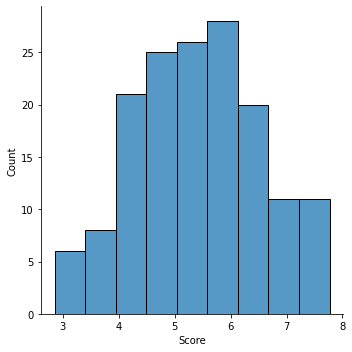

In [171]:
sns.displot(data_19_final['Score'])

Since ir follows almost a normal distribution , the mean and the median values for Score will be almost equal.

In [176]:
print(data_19_final['Score'].mean())
print(data_19_final['Score'].median())

5.407096153846153
5.3795


G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

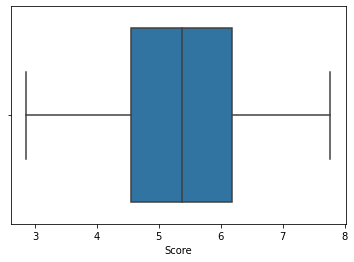

In [173]:
sns.boxplot(data_19_final['Score'])

In [182]:
data_19_region = data_19_final.groupby('Region')['Score'].describe()
data_19_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.267500,0.055861,7.228,7.24775,7.2675,7.28725,7.307
Central and Eastern Europe,30.0,5.566733,0.573828,4.332,5.26425,5.5660,6.03750,6.852
Eastern Asia,6.0,5.688833,0.475940,5.191,5.32125,5.6580,5.89275,6.446
Latin America and Caribbean,21.0,5.954429,0.724203,3.597,5.77900,6.1050,6.30000,7.167
Middle East and Northern Africa,19.0,5.237000,1.060322,3.380,4.50450,5.2080,6.11000,7.139
North America,2.0,7.085000,0.272943,6.892,6.98850,7.0850,7.18150,7.278
Southeastern Asia,9.0,5.273667,0.618107,4.360,4.79600,5.1920,5.63100,6.262
Southern Asia,7.0,4.526857,0.792778,3.203,4.19050,4.4560,4.99750,5.653
Sub-Saharan Africa,40.0,4.300050,0.625149,2.853,3.96300,4.4040,4.67125,5.888


**Observations**
1. Australia and New Zealand have the highest score 
2. Sub Saharan Africa has the least score. Middle east and Northern Africa is happier than the Sub Saharan Africa.  
3. Western Europe more happy than Eastern and central Europe 
4. North America has a very high score but there is more deviation than Australia and New Zealand.
5. Eastern Asia more happy than Southern Asia and Southeastern Asia. Between Southern and Southeastern Asia , SE Asia is happier.
6. Central and Eastern Europe, Eastern Asia and Latin America and Caribbean	have happiness score in the range (5.5,6) which means they are comparable , not much of a difference. However , Latin America and Caribbean	has a higher deviation than the other two i.e. more ouliers than the other two. 

In [188]:
data_19_region.index

Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='Region')

**Plotting to better visualize the observations**

In [205]:
region_mean = pd.DataFrame(data_19_final.groupby('Region')['Score'].mean())
region_mean.rename(columns = {'Score' : 'Mean'}, inplace = True)
region_mean.sort_values(by = "Mean", inplace = True) 
region_mean

,Mean
Region,
Sub-Saharan Africa,4.300050
Southern Asia,4.526857
Middle East and Northern Africa,5.237000
Southeastern Asia,5.273667
Central and Eastern Europe,5.566733
Eastern Asia,5.688833
Latin America and Caribbean,5.954429
Western Europe,6.898400
North America,7.085000


[Text(0, 0, 'Sub-Saharan Africa'),
 Text(1, 0, 'Southern Asia'),
 Text(2, 0, 'Middle East and Northern Africa'),
 Text(3, 0, 'Southeastern Asia'),
 Text(4, 0, 'Central and Eastern Europe'),
 Text(5, 0, 'Eastern Asia'),
 Text(6, 0, 'Latin America and Caribbean'),
 Text(7, 0, 'Western Europe'),
 Text(8, 0, 'North America'),
 Text(9, 0, 'Australia and New Zealand')]

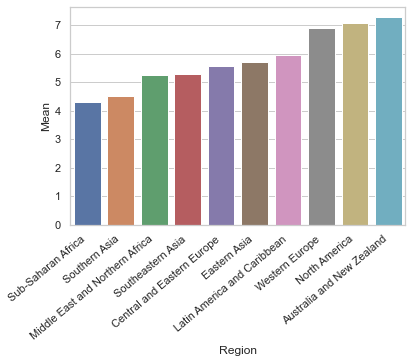

In [208]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = region_mean,
           x= region_mean.index,
           y= 'Mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [210]:
region_std = pd.DataFrame(data_19_final.groupby('Region')['Score'].std())
region_std.rename(columns = {'Score' : 'std'}, inplace = True)
region_std.sort_values(by = "std", inplace = True) 
region_std

,std
Region,
Australia and New Zealand,0.055861
North America,0.272943
Eastern Asia,0.475940
Central and Eastern Europe,0.573828
Southeastern Asia,0.618107
Sub-Saharan Africa,0.625149
Western Europe,0.679609
Latin America and Caribbean,0.724203
Southern Asia,0.792778


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Eastern Asia'),
 Text(3, 0, 'Central and Eastern Europe'),
 Text(4, 0, 'Southeastern Asia'),
 Text(5, 0, 'Sub-Saharan Africa'),
 Text(6, 0, 'Western Europe'),
 Text(7, 0, 'Latin America and Caribbean'),
 Text(8, 0, 'Southern Asia'),
 Text(9, 0, 'Middle East and Northern Africa')]

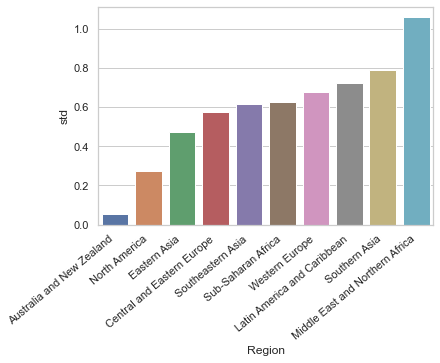

In [212]:
sns.set_theme(style="whitegrid")
az = sns.barplot(data = region_std,
           x= region_std.index,
           y= 'std')
az.set_xticklabels(az.get_xticklabels(), rotation=40, ha="right")

In [217]:
region_mean_all = pd.DataFrame(data_19_final.groupby('Region')[data_19_final.columns[2:-1]].mean())
region_mean_all.rename(columns = {'Score':'mean_score', 
                                  'GDP per capita':'mean_GDP per capita', 
                                  'Social support' : 'mean_Social support',
                                  'Healthy life expectancy' : 'mean_Healthy life expectancy',
                                  'Freedom to make life choices' : 'mean_Freedom to make life choices',
                                  'Generosity':'mean_Generosity',
                                  'Perceptions of corruption' :'mean_Perceptions of corruption'}, inplace = True)
region_mean_all

,mean_score,mean_GDP per capita,mean_Social support,mean_Healthy life expectancy,mean_Freedom to make life choices,mean_Generosity,mean_Perceptions of corruption
Region,,,,,,,
Australia and New Zealand,7.267500,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000
Central and Eastern Europe,5.566733,1.029133,1.335900,0.817267,0.359500,0.144333,0.065100
Eastern Asia,5.688833,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667
Latin America and Caribbean,5.954429,0.924286,1.339714,0.811857,0.440905,0.144619,0.072048
Middle East and Northern Africa,5.237000,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000
North America,7.085000,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000
Southeastern Asia,5.273667,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444
Southern Asia,4.526857,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429
Sub-Saharan Africa,4.300050,0.443750,0.916675,0.407550,0.337350,0.187725,0.094500


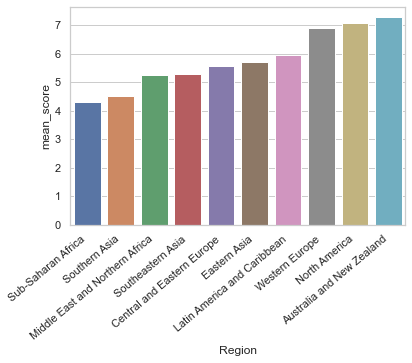

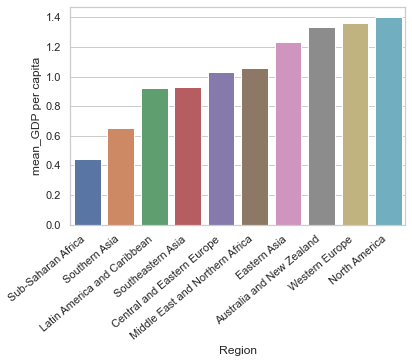

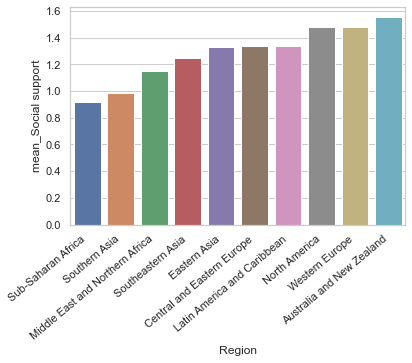

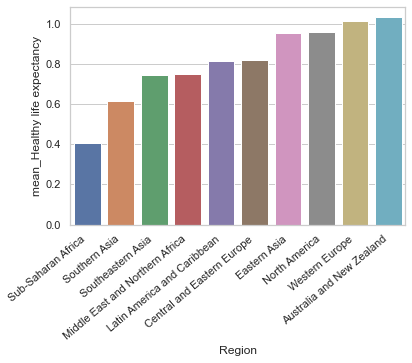

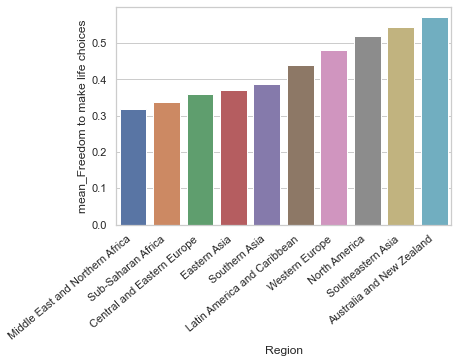

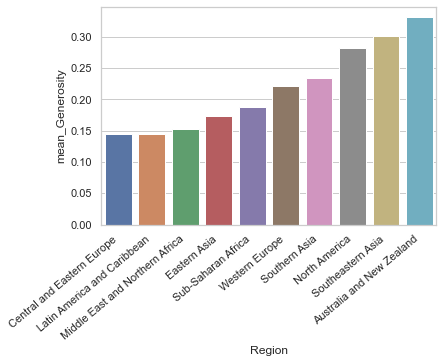

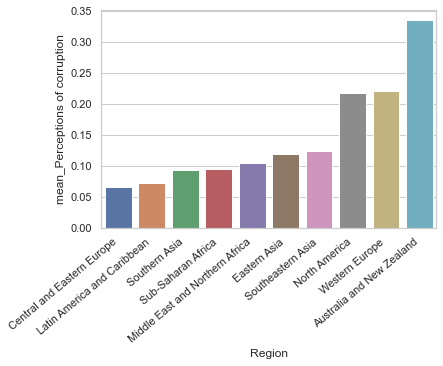

In [230]:
for mean_col in region_mean_all.columns:
    region_mean_all.sort_values(by = mean_col, inplace = True)
    
    sns.set_theme(style="whitegrid")
    azx = sns.barplot(data = region_mean_all,
                      x= region_mean_all.index,
                      y= mean_col)
    azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
    plt.show(azx)
   

In [232]:
region_median_all = pd.DataFrame(data_19_final.groupby('Region')[data_19_final.columns[2:-1]].median())
region_median_all.rename(columns = {'Score':'median_score', 
                                  'GDP per capita':'median_GDP per capita', 
                                  'Social support' : 'median_Social support',
                                  'Healthy life expectancy' : 'median_Healthy life expectancy',
                                  'Freedom to make life choices' : 'median_Freedom to make life choices',
                                  'Generosity':'median_Generosity',
                                  'Perceptions of corruption' :'median_Perceptions of corruption'}, inplace = True)
region_median_all

,median_score,median_GDP per capita,median_Social support,median_Healthy life expectancy,median_Freedom to make life choices,median_Generosity,median_Perceptions of corruption
Region,,,,,,,
Australia and New Zealand,7.2675,1.3375,1.5525,1.0310,0.5710,0.3310,0.3350
Central and Eastern Europe,5.5660,1.0595,1.4000,0.8165,0.3455,0.1290,0.0375
Eastern Asia,5.6580,1.3140,1.3480,0.9750,0.3955,0.2050,0.0985
Latin America and Caribbean,6.1050,0.9600,1.4010,0.8310,0.4890,0.1260,0.0740
Middle East and Northern Africa,5.2080,1.0430,1.2250,0.7950,0.3050,0.1330,0.1060
North America,7.0850,1.3990,1.4810,0.9565,0.5190,0.2825,0.2180
Southeastern Asia,5.1920,0.8070,1.2030,0.6600,0.5470,0.2660,0.0730
Southern Asia,4.4560,0.6770,0.9280,0.6040,0.4570,0.2200,0.0890
Sub-Saharan Africa,4.4040,0.3730,0.9305,0.4270,0.3540,0.1975,0.0855


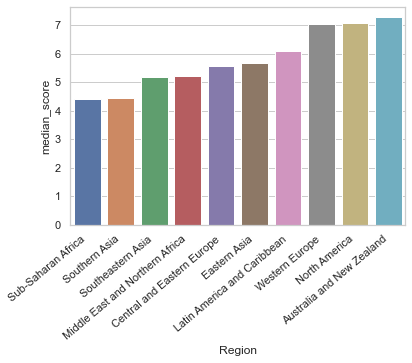

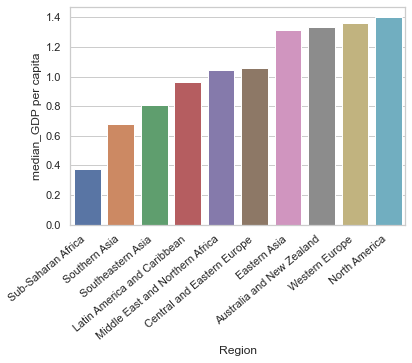

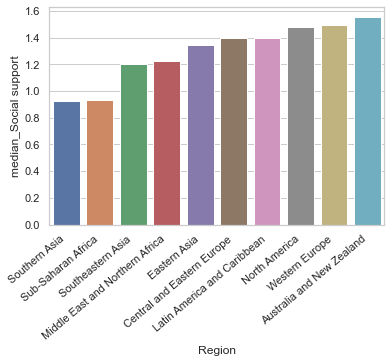

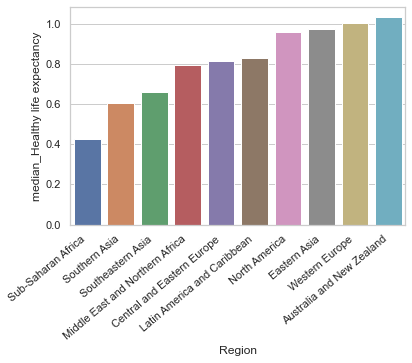

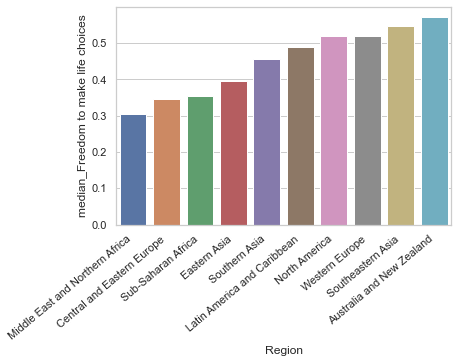

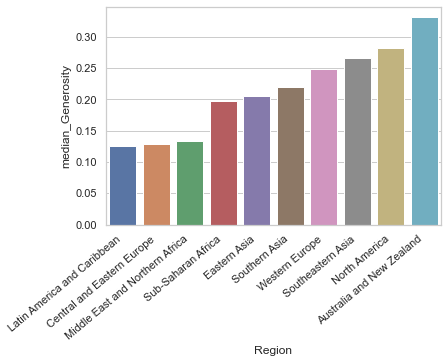

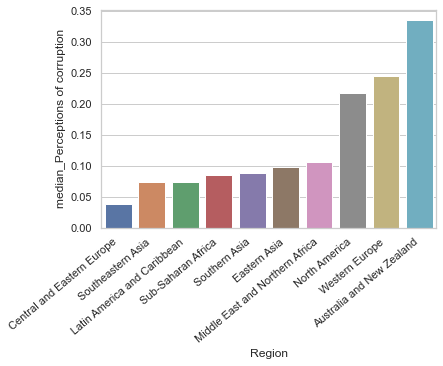

In [233]:
for median_col in region_median_all.columns:
    region_median_all.sort_values(by = median_col, inplace = True)
    
    sns.set_theme(style="whitegrid")
    azx = sns.barplot(data = region_median_all,
                      x= region_median_all.index,
                      y= median_col)
    azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
    plt.show(azx)
   

**Conclusions regarding other metrics and score**
1. As noted earlier , countries with high GDP per capita does have high scores. But , now we can see that North America has the highest GDP but now the highest score and the region of Australia and NZ which has the highest score ranks 3rd in terms of GDP per capita. However, on the contrary I see, that Sub Saharan Africa which has the least score also has the least GDP per capita among all regions. 
2. Australia and NZ has the highest Social support and Sub Saharan Africa has the least. In the diagram , Southern Asia has almost the same score for social support.
3. Australia and NZ has the highest Healthy life expectancy and Sub Saharan Africa has the least.
4. Australia and NZ has the highest freedom to make life choices score. Middle East and Northern Africa have the least. Sub Saharan Africa has a score in Make free life choices greater than two regions.
5. Australia and NZ has the highest Genorosity score. Strangely, Central and Eastern Europe, which has a happiness score around 5.56 is having a very low genorosity score. While this shows a different picture , there is another strange feature : Sub Saharan Africa , the least in happiness score, has quite a good genorosity score. Thus proving the genorosity and happiness cannot be correlated. 